Novo Ensino Suplementar

Aluno: João Pedro Pacheco Santos

Módulo: 5

Banco de dados: Características sobre tumores de mama (Kaggle) e Análise


# PARTE 1 DO TRABALHO - 1o BIMESTRE

# Importar bibliotecas e ler a base de dados

In [26]:
import pandas as pd
import os
import kagglehub

# Construct the full path to the CSV file
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")
csv_file_path = os.path.join(path, 'breast-cancer.csv')

# Read the CSV file into a DataFrame
try:
    data = pd.read_csv(csv_file_path)
    # Rename the DataFrame from data to df
    df = data
    # Display the head of the DataFrame
    display(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {csv_file_path}")
    print("Listing files in the downloaded directory:")
    for root, dirs, files in os.walk(path):
        for name in files:
            print(os.path.join(root, name))

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Análise de dados

In [27]:
# Observar a descrição dos dados

print("Total data points",df.shape[0])
print("Total number of features(as number of columns) are ",
df.shape[1]-1)
df.describe()

Total data points 569
Total number of features(as number of columns) are  31


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [28]:
# Olhar se há dados nulos

null_values = df.isnull().values.any()
if null_values == True:
    print("Há dados faltantes nesse banco de dados")
else:
    print("Não há dados faltantes nesse banco de dados")

Não há dados faltantes nesse banco de dados


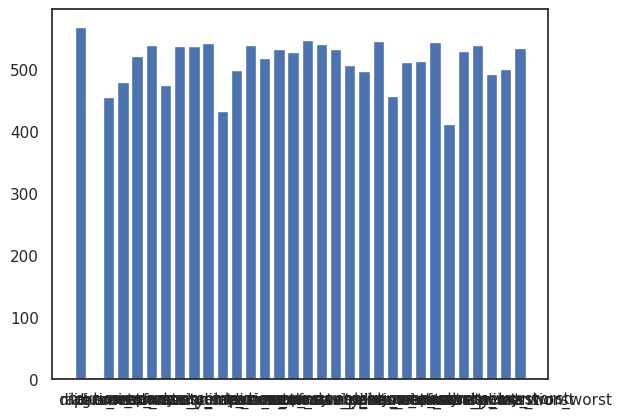

In [29]:
# Olhar a quantidade de dados únicos

valoresunicos = df.nunique()

plt.bar(df.columns, valoresunicos)
plt.show()

In [30]:
# Olhar se há dados duplicados

print(df.duplicated().sum())

0


# Observação com Matplotlib

Original unique values in 'diagnosis': ['M' 'B']
Unique values in 'diagnosis' after mapping: [1 0]
Numero total de data =   569
Maligno (diagnosis =1) = 37.3%
Benigno (diagnosis =0)= 62.7%


<Axes: title={'center': 'Maligno (1) vs Benigno (0)'}, xlabel='diagnosis', ylabel='Total'>

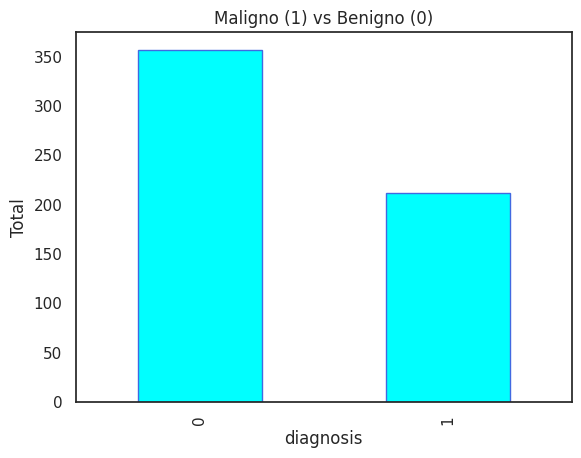

In [31]:
#Replace M with 1 and Begnin with 0
print("Original unique values in 'diagnosis':", df["diagnosis"].unique())
df["diagnosis"] = df["diagnosis"].astype(str).str.strip().map({'M': 1, 'B': 0})
print("Unique values in 'diagnosis' after mapping:", df["diagnosis"].unique())


#Plot the number of data points with mailgnant and benign as their diagnosis
print("Numero total de data =  ", len(df))
print("Maligno (diagnosis =1) = {}%".format(round(df["diagnosis"].mean(),3)*100))
print("Benigno (diagnosis =0)= {}%".format((1-round(df["diagnosis"].mean(),3))*100))

df.groupby("diagnosis")['id'].count().plot.bar(ylabel = "Total", title = "Maligno (1) vs Benigno (0)", color = 'cyan', edgecolor = "royalblue")

<Axes: >

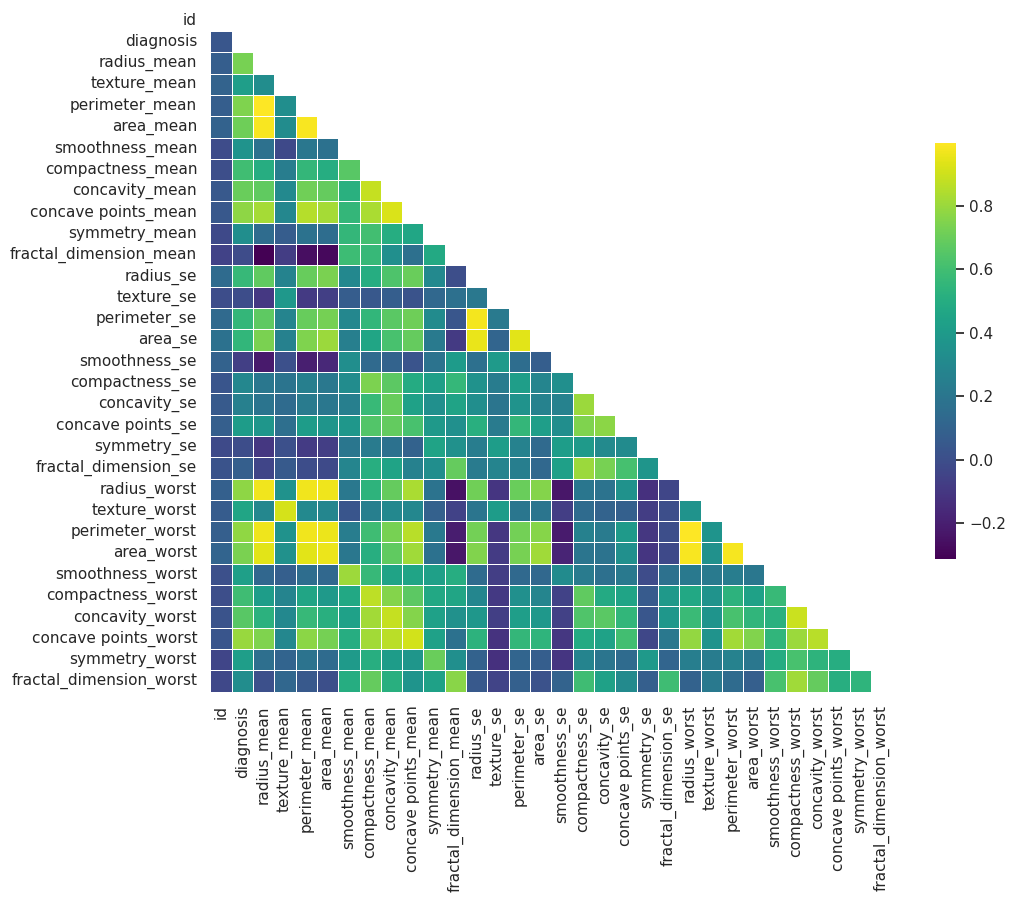

In [32]:
# Olhar as correlações

sns.set_theme(style="white")
corr = df.corr()
# Gerar a mascara
mask = np.triu(np.ones_like(corr, dtype=bool))
# Gerar a visualização
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='viridis', square=True, linewidths=.5, cbar_kws={"shrink": .6})

# PARTE 2 DO TRABALHO - 2o BIMESTRE

# Classificação

diagnosis
0    357
1    212
Name: count, dtype: int64


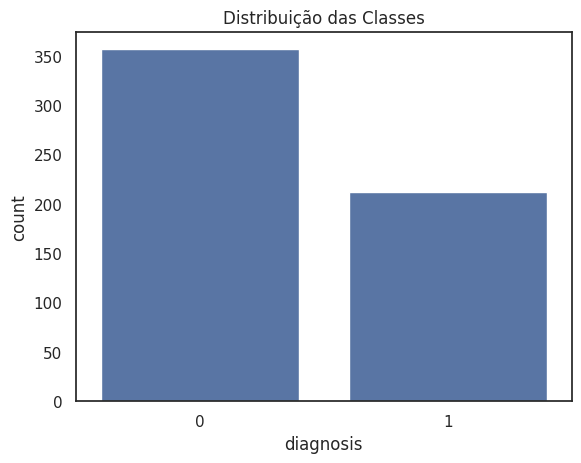

Acurácia: 0.9737
Recall: 0.9286
F1-score: 0.9630
Precisão: 1.0000

Relatório completo:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



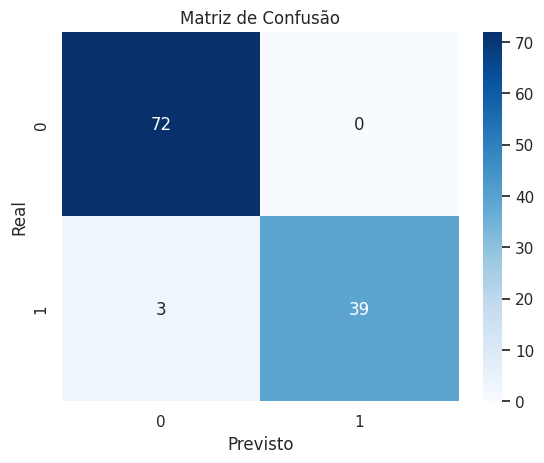

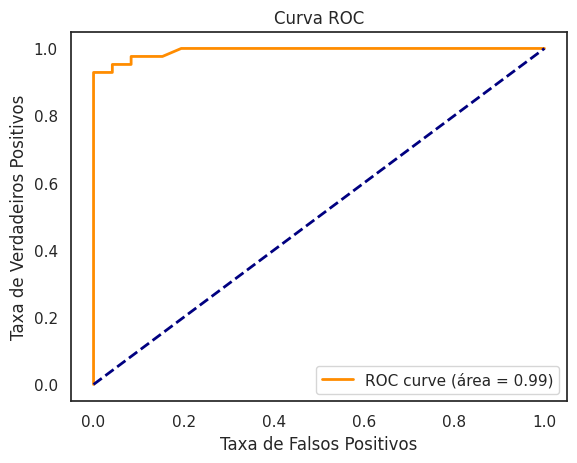

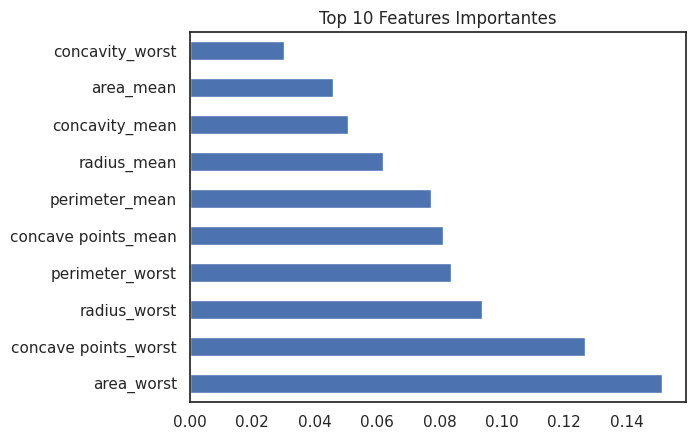

In [33]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc


# Visualização inicial
print(df['diagnosis'].value_counts())
sns.countplot(data=df, x='diagnosis')
plt.title('Distribuição das Classes')
plt.show()

# Pré-processamento
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Codificar variável target
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # M=1, B=0

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Previsões
y_pred = clf.predict(X_test)

# Avaliação detalhada
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Acurácia: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Precisão: {precision:.4f}')
print('\nRelatório completo:\n', classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Curva ROC
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Importância das variáveis
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features Importantes')
plt.show()

# Discussão:
# O modelo apresentou alta performance geral, com recall e F1-score indicando boa capacidade de identificar corretamente casos malignos.
# Visualmente, a curva ROC mostra uma separação clara entre classes, confirmando a eficácia do modelo.
# As variáveis mais importantes têm relação direta com características morfológicas do tumor, o que é coerente com a literatura.
